In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm
import multiprocessing as mp

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
backend = Aer.get_backend('qasm_simulator')

def parallel(args):
    model = args[0]
    x = args[1]
    y = args[2]
    verbose = args[3]
    
    model.train(x, y, verbose = verbose)
    
    return model

# Trainability, Ideal

## 1D, Gaussian Function

### Generate Data

In [23]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn])
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

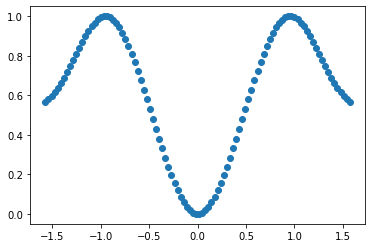

In [4]:
plt.plot(x_qcn, y, 'o')
plt.show()

### Training Models

In [42]:
np.random.seed(42)
x = np.random.uniform(low=0, high=1, size=(100,1))
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)
y = scaler(y, a=0, b=1)

In [36]:
x_qcn = np.pi*x - np.pi/2

In [37]:
qcn_list = loader(data_path("trainability_qcn_1D_reps_2_noisy"))

In [38]:
y_pred = qcn_list[0].predict(x_qcn)

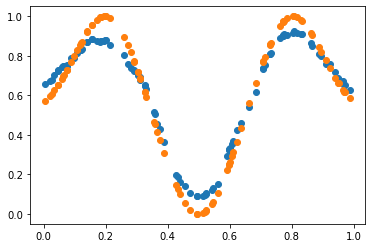

In [45]:
plt.plot(x, y_pred,"o")
plt.plot(x, y,"o")

In [43]:
print(np.mean((y_pred - y)**2))

0.004341849827559158


In [44]:
qcn_list[0].loss[-1]

0.004567355471222385